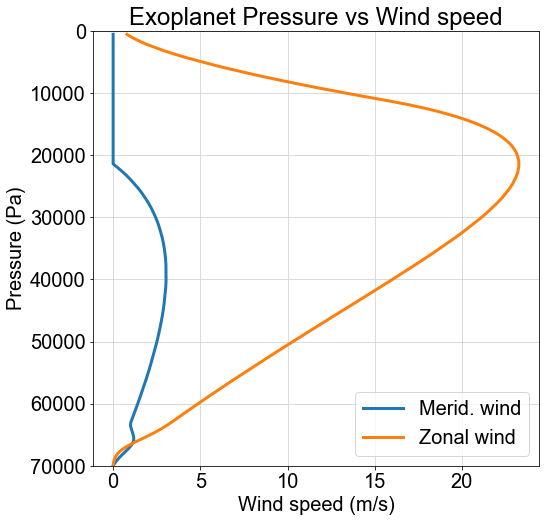

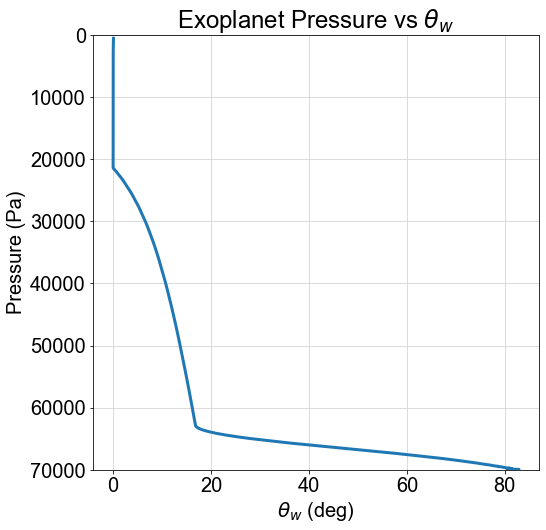

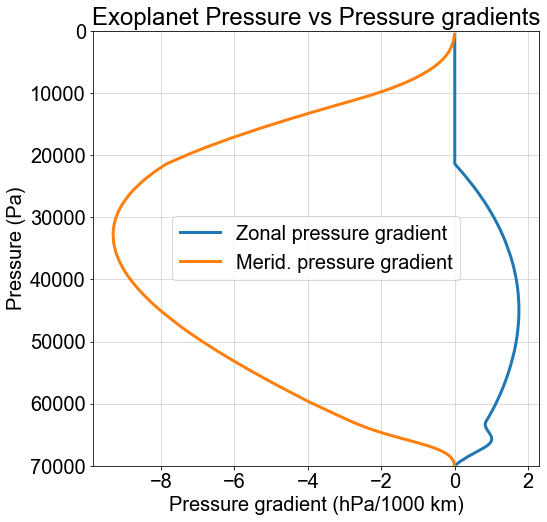

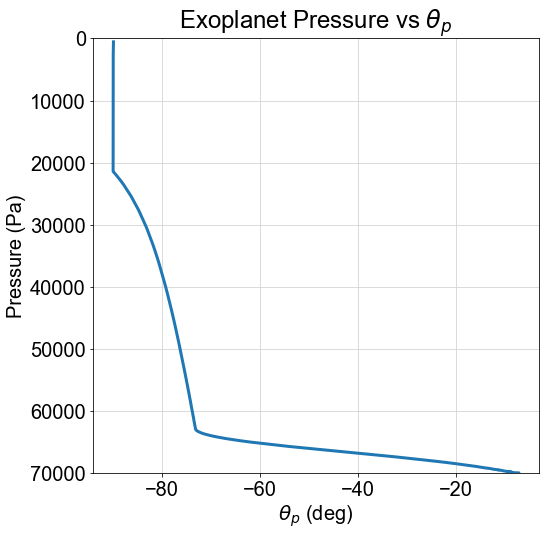

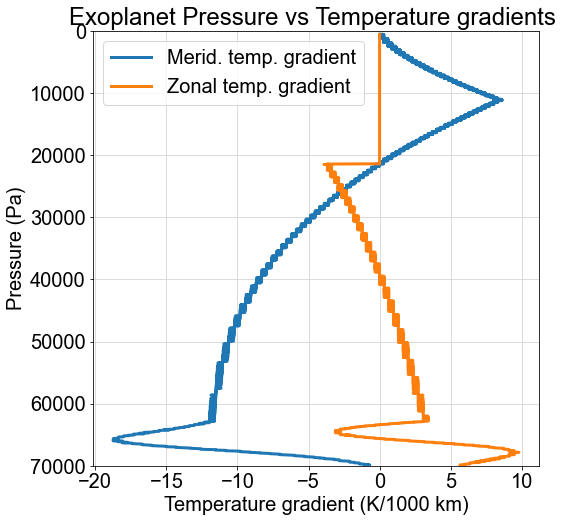

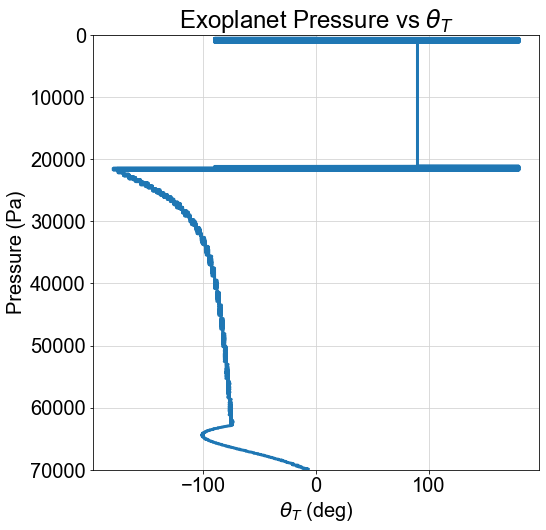

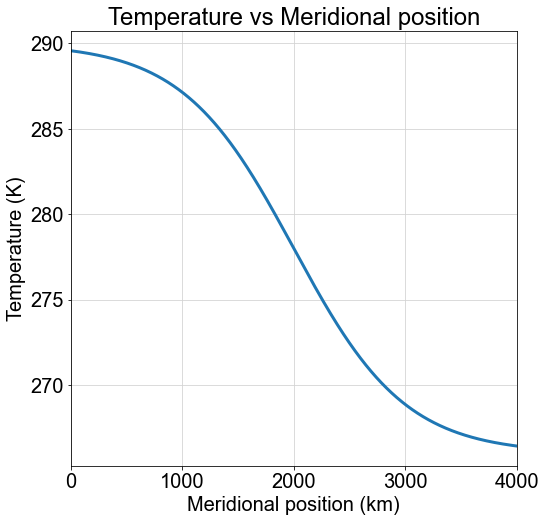

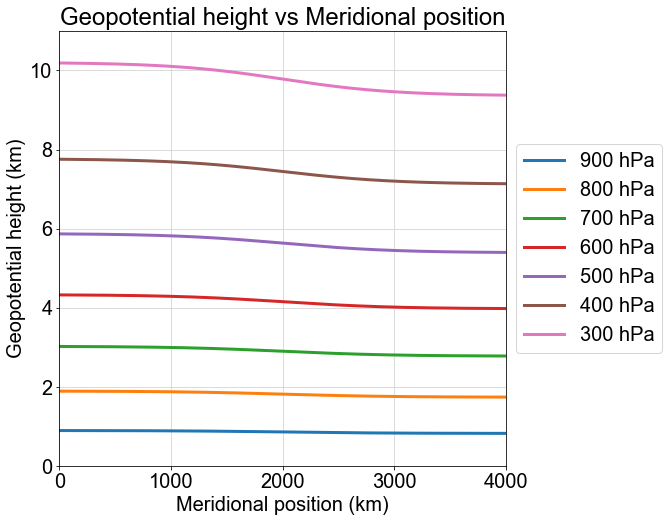

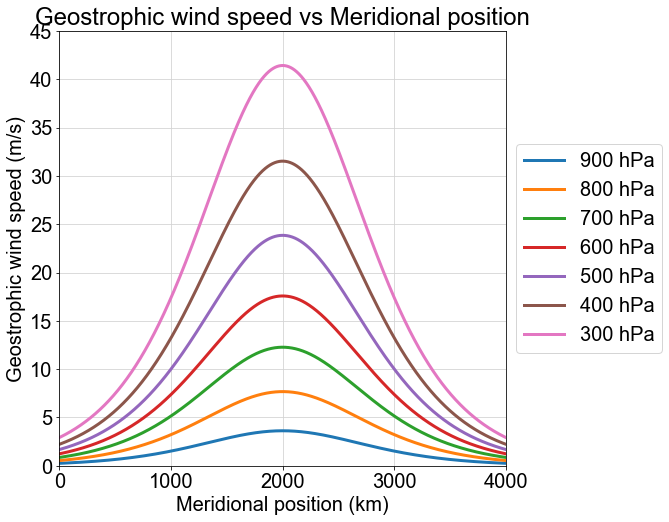

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib
import math

%matplotlib inline
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

R=8.31446261815324
data= np.genfromtxt('D:Desktop/Assignments/exoplanetdata.csv',skip_header=13,delimiter='\t').T

#print(np.shape(data))
p=data[0] #pressure
T=data[1] #temp
dens=data[2] #air density
zonwind= data[3] #zonal wind
merwind= data[4] #merid wind
N2=data[5]
CO=data[6]
O2=data[7]
H2=data[8]
Ar=data[9]
H2O=data[10]



#Temp
# figure(1,figsize=(8,8))
# plt.plot(T,p,lw=4)
# plt.grid(c='lightgray')
# plt.xlabel("Temperature (K)")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(70000,0)
# plt.title('Exoplanet 2023A Pressure vs Temperature')

# #Air density
# figure(2,figsize=(8,8))
# plt.plot(dens,p,lw=4)
# plt.grid(c='lightgray')
# plt.xlabel("Air density ($kg/m^3$)")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(70000,0)
# plt.title('Exoplanet 2023A Pressure vs Air Density')

#Number density
# figure(3,figsize=(8,8))
# plt.plot(N2,p,label='$N_2$',lw=4)
# plt.plot(O2,p,label='$O_2$',lw=4)
# plt.plot(CO,p,label='$CO$',lw=4)
# plt.plot(H2,p,label='$H_2$',lw=4)
# plt.plot(Ar,p,label='$Ar$',lw=4)
# plt.plot(H2O,p,label='$H_2O$',lw=4)
# plt.grid(c='lightgray')
# plt.xlabel("Number density ($10^{22} molecules/m^3$)")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(70000,0)
# plt.legend()
# plt.xscale('log')
# plt.title('Exoplanet 2023A Atmospheric Number Densities')
#At what pressure does the tropopause begin and pressure ranges where temp
#inversions are present?

N2dens=N2*28.0134/1000*10**22/(6.0221408e23)
O2dens=O2*31.999/1000*10**22/(6.0221408e23)
COdens=CO*28.01/1000*10**22/(6.0221408e23)
H2dens=H2*2.016/1000*10**22/(6.0221408e23)
Ardens=Ar*39.948/1000*10**22/(6.0221408e23)
H2Odens=H2O*18.01528/1000*10**22/(6.0221408e23)
#Mass densities
# figure(4,figsize=(8,8))
# plt.plot(N2dens,p,label='$N_2$',lw=4) # (molecules/m^3)*(kg/mol)/molecules
# plt.plot(O2dens,p,label='$O_2$',lw=4)
# plt.plot(COdens,p,label='$CO$',lw=4)
# plt.plot(H2dens,p,label='$H_2$',lw=4)
# plt.plot(Ardens,p,label='$Ar$',lw=4)
# plt.plot(H2Odens,p,label='$H_2O$',lw=4)
# plt.grid(c='lightgray')
# plt.xlabel("Mass density ($kg/m^3$)")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(70000,0)
# plt.legend()
# plt.xscale('log')
# plt.title('Exoplanet 2023A Atmospheric Mass Densities')

#specific humidity
q=H2Odens/dens
# figure(6,figsize=(8,8))
# plt.plot(q,p,lw=4)
# plt.grid(c='lightgray')
# plt.xlabel("Specific humidity")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(70000,0)
# plt.title('Exoplanet 2023A Pressure vs Specific humidity')

#missing mass density
xmiss=dens-N2dens-O2dens-COdens-H2Odens-Ardens-H2dens
# figure(7,figsize=(8,8))
# plt.plot(xmiss,p,lw=4)
# plt.grid(c='lightgray')
# plt.xlabel("Missing density ($kg/m^3$)")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(70000,0)
# plt.title('Exoplanet 2023A Pressure vs Missing Atmospheric Density')

#plot mass frac
XN2=N2dens/dens
XO2=O2dens/dens
XCO=COdens/dens
XH2=H2dens/dens
XAr=Ardens/dens
XH2O=H2Odens/dens
Xxmiss=xmiss/dens

# figure(8,figsize=(8,8))
# plt.plot(XN2,p,label='$N_2$',lw=4) # (molecules/m^3)*(kg/mol)/molecules
# plt.plot(XO2,p,label='$O_2$',lw=4)
# plt.plot(XCO,p,label='$CO$',lw=4)
# plt.plot(XH2,p,label='$H_2$',lw=4)
# plt.plot(XAr,p,label='$Ar$',lw=4)
# plt.plot(XH2O,p,label='$H_2O$',lw=4)
# plt.plot(Xxmiss,p,label='$x_{miss}$',lw=4)
# plt.grid(c='lightgray')
# plt.xlabel("Mass fraction")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(70000,0)
# plt.legend()
# plt.xscale('log')
# plt.title('Exoplanet 2023A Pressure vs Atmospheric Mass Fractions')

#Effective molar mass (from ideal gas law)
molmass=dens*T*R/p
# figure(9,figsize=(8,8))
# plt.plot(molmass,p,lw=4)
# plt.grid(c='lightgray')
# plt.xlabel("Effective molar mass ($kg/mol$)")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(70000,0)
# plt.title('Exoplanet 2023A Pressure vs Effective Atmospheric Molar Mass')

N2mm=28.0134/1000
O2mm=31.999/1000
COmm=28.01/1000
H2mm=2.016/1000
Armm=39.948/1000
H2Omm=18.01528/1000

#Molar mass of x_miss
x_molmass=(molmass-XN2*N2mm-XO2*O2mm-XCO*COmm-XH2*H2mm-XAr*Armm-XH2O*H2Omm)/Xxmiss
x_molmass=Xxmiss/(1/molmass-(XN2/N2mm+XO2/O2mm+XCO/COmm+XH2/H2mm+XAr/Armm+XH2O/H2Omm))
# figure(10,figsize=(8,8))
# plt.plot(x_molmass,p,lw=4)
# plt.grid(c='lightgray')
# plt.xlabel("Effective molar mass of $x_{miss}$ ($kg/mol$)")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(70000,0)
# plt.title('Exoplanet 2023A Pressure vs Effective Molar Mass of Missing Density')


#Integrate total mass of water vapour per unit area in the atmospheric column
M_v=np.trapz(q,np.flip(p))/6.1
#print(M_v)

#Relative humidity
m_v=18.01528/1000
m_d=0.028964
L=2.45e6
T0=273
e0=6.11e2
RH=molmass*p*q/(H2Omm*e0*np.exp(m_v*L/R*(1/T0-1/T)))
# figure(11,figsize=(8,8))
# plt.plot(RH,p,lw=4)
# plt.grid(c='lightgray')
# plt.ylabel("Pressure (Pa)")
# plt.xlabel('Relative humidity')
# plt.ylim(70000,0)
# plt.title('Exoplanet 2023A Pressure vs Relative Humidity')

#Question 2*******************************
#Temp as function of r

# es=876
# a=1.2e-9
# b=1.44e-23
# r_range=np.arange(3e-8,6.324555320336758e-08,0.01e-8)
# def T_r(r):
#     return m_v*L/(m_v*L/T0-R*np.log(es/(e0*(1+a/r-b/r**3))))

# # figure(12,figsize=(8,8))
# # plt.plot(r_range*10**9,T_r(r_range),lw=4)
# # plt.grid(c='lightgray')
# # plt.xlabel("Droplet radius at equilibrium (nm)")
# # plt.ylabel('Temperature (K)')
# # plt.title('Temperature vs Droplet Radius for a Parcel of Air')


# #2e
# M=5
# r0=3e-8
# Nd=6e8
# r_range=np.linspace(1e-9,2e-5,num=int(1e5))

# def M_v_func(r):
#     M=5
#     T=263.15
#     p=70000
#     a=1.2e-9
#     b=1.44e-23
#     m_v=18.01528/1000
#     m_d=0.028964
#     L=2.45e6
#     T0=273
#     e0=6.11e2
#     R=8.31446261815324
#     e=(1+a/r-b/r**3)*e0*np.exp(m_v*L/R*(1/T0-1/T))
#     m=m_d*(1+e/p*(m_v/m_d-1))
#     return e/p*m_v/m*M

# figure(13,figsize=(8,8))
# plt.plot(r_range,M_v_func(r_range),lw=4,label='From Eqn 1.9')
# plt.plot(r_range,0.0198+4*np.pi/3*Nd*1000*(r0**3-r_range**3),lw=4,label='From Eqn 1.10')
# plt.grid(c='lightgray')
# plt.ylim(-0.025,0.025)
# plt.xlim(0,2e-5)
# plt.ylabel('$M_v$ (kg)')
# plt.xlabel('Droplet radius (m)')
# plt.title('Mass of Water Vapour vs Droplet Radius')


#A2 *********************************************************************

#Q1
#a)
c_p=XN2*7/2*R/N2mm + XO2*7/2*R/O2mm + XCO*7/2*R/COmm + XH2*7/2*R/H2mm + XAr*5/2*R/Armm + Xxmiss*5/2*R/x_molmass + XH2O*1860
# figure(1,figsize=(8,8))
# plt.plot(c_p,p,lw=3)
# plt.grid(c='lightgray')
# plt.xlabel("$c_p$ of atmosphere (J/kg/K)")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(70000,0)
# plt.title('Exoplanet 2023A Pressure vs $c_p$ of the Atmosphere')

#b)
#print(p[0])
pot_temp=T*(p[0]/p)**(R/molmass/c_p)
# figure(2,figsize=(8,8))
# plt.plot(pot_temp,p,lw=3)
# plt.grid(c='lightgray')
# plt.xlabel("$ \Theta $ (K)")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(70000,0)
# plt.title('Exoplanet 2023A Pressure vs Potential Temperature')

#c
g=6.1
dry_lapse=g/c_p
# figure(3,figsize=(8,8))
# plt.plot(dry_lapse,p,lw=3)
# plt.grid(c='lightgray')
# plt.xlabel("Dry adiabatic lapse rate (K/m)")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(70000,0)
# plt.title('Exoplanet 2023A Pressure vs Dry Adiabatic Lapse Rate')

#e)
T_parcel=[]
def parcel_temp(press,T_initial):
    for i in np.arange(0,len(press)):
        m_v=18.01528/1000
        L=2.45e6
        T0=273
        e0=6.11e2
        R=8.31446261815324
        rho_parcel=press[i]*molmass[0]/R/T_initial
        es=e0*np.exp((m_v*L/R*(1/T0-1/T_initial)))
        qs=m_v/molmass[0]*es/press[i]
        dT_dp= 1/c_p[0]/rho_parcel*(1+molmass[0]*L*qs/R/T_initial)/(1+m_v*L**2*qs/c_p[0]/R/T_initial**2)
        T_parcel.append(T_initial-dT_dp*0.500)
        T_initial=T_initial-dT_dp*0.500
        
#parcel_temp(np.flip(np.arange(0.1,70000+0.5,step=0.500)),T[0])


# figure(4,figsize=(8,8))
# plt.plot(T_parcel,np.flip(np.arange(0.1,70000+0.5,step=0.500)),lw=3,label='Pseudoadiabatic Parcel')
# plt.plot(T,p,lw=3,label='Air')
# plt.grid(c='lightgray')
# plt.xlabel("Parcel Temperature (K)")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(70000,0)
# plt.title('Exoplanet 2023A Pressure vs Pseudoadiabatic Parcel Temperature')
# plt.legend()

#g
sigma1=10**-28
sigma2=10**-27


int1=[]
int2=[]
# for i in np.arange(0,len(p[300:-1])):
#     int1.append(np.trapz(sigma1*H2O[300+i:-1]*10**22/(dens[300+i:-1]*g),p[300+i:-1]))
#     int2.append(np.trapz(sigma2*H2O[300+i:-1]*10**22/(dens[300+i:-1]*g),p[300+i:-1]))
    
# figure(5,figsize=(8,8))
# plt.plot(-np.array(int1),p[300:-1],label='$\sigma_1$',lw=3)
# plt.plot(-np.array(int2),p[300:-1],label='$\sigma_2$',lw=3)
# plt.grid(c='lightgray')
# plt.xlabel("Optical depth")
# plt.ylabel('Pressure (Pa)')
# plt.ylim(60000,0)
# plt.title('Exoplanet Pressure vs Optical depth')
# plt.legend()

#A3 starts here #######################################

#a)

u=zonwind
v=merwind
figure(5,figsize=(8,8))
plt.plot(merwind,p,label='Merid. wind',lw=3)
plt.plot(zonwind,p,label='Zonal wind',lw=3)
plt.grid(c='lightgray')
plt.xlabel("Wind speed (m/s)")
plt.ylabel('Pressure (Pa)')
plt.ylim(70000,0)
plt.title('Exoplanet Pressure vs Wind speed')
plt.legend()

#b)
theta_w=[]
for i in np.arange(1,len(merwind)):
    theta_w.append(math.atan2(merwind[i],zonwind[i])*180/np.pi)
    
    
figure(2,figsize=(8,8))
plt.plot(theta_w,p[1:],lw=3)
plt.grid(c='lightgray')
plt.xlabel(r"$ \theta_w$ (deg)")
plt.ylabel('Pressure (Pa)')
plt.ylim(70000,0)
plt.title(r'Exoplanet Pressure vs $\theta_w$')

f=0.000147
dpdy=-dens*f*u/100*1000*1000
dpdx=dens*f*v/100*1000*1000

figure(3,figsize=(8,8))
plt.plot(dpdx,p,lw=3,label=r'Zonal pressure gradient')
plt.plot(dpdy,p,lw=3,label=r'Merid. pressure gradient')
plt.grid(c='lightgray')
plt.xlabel(r"Pressure gradient (hPa/1000 km)")
plt.ylabel('Pressure (Pa)')
plt.ylim(70000,0)
plt.title(r'Exoplanet Pressure vs Pressure gradients')
plt.legend()

theta_p=[]
for i in np.arange(1,len(dpdy)):
    theta_p.append(math.atan2(dpdy[i],dpdx[i])*180/np.pi)
    
figure(4,figsize=(8,8))
plt.plot(theta_p,p[1:],lw=3)
plt.grid(c='lightgray')
plt.xlabel(r"$\theta_p$ (deg)")
plt.ylabel('Pressure (Pa)')
plt.ylim(70000,0)
plt.title(r'Exoplanet Pressure vs $\theta_p$')

dudp=np.gradient(u,p)
dvdp=np.gradient(v,p)

dTdy=f*molmass*p/R*dudp*1000*1000
dTdx=-f*molmass*p/R*dvdp*1000*1000

figure(6,figsize=(8,8))
plt.plot(dTdy,p,lw=3,label=r'Merid. temp. gradient')
plt.plot(dTdx,p,lw=3,label=r'Zonal temp. gradient')
plt.grid(c='lightgray')
plt.xlabel(r"Temperature gradient (K/1000 km)")
plt.ylabel('Pressure (Pa)')
plt.ylim(70000,0)
plt.title(r'Exoplanet Pressure vs Temperature gradients ')
plt.legend()

theta_T=[]
for i in np.arange(1,len(dTdx)):
    theta_T.append(np.arctan2(dTdy[i],dTdx[i])*180/np.pi)
figure(7,figsize=(8,8))
plt.plot(theta_T,p[1:],lw=3)
plt.grid(c='lightgray')
plt.xlabel(r"$\theta_T$ (deg)")
plt.ylabel('Pressure (Pa)')
plt.ylim(70000,0)
plt.title(r'Exoplanet Pressure vs $\theta_T$')



#Problem 2
g=9.81
m= 29/1000 #(mol/kg)


T0=290
y0=2000
dT=12
dy=1000

T1=np.array([T0-dT*(1+np.tanh((np.arange(0,4000)-y0)/dy))]).squeeze()
    
figure(8,figsize=(8,8))
plt.plot(np.arange(0,4000),T1,lw=3)
plt.grid(c='lightgray')
plt.xlabel('Meridional position (km)')
plt.ylabel('Temperature (K)')
#plt.ylim(70000,0)
plt.title('Temperature vs Meridional position')
plt.xlim(0,4000)

def p(y,z):
    p0=1000
    T0=290
    y0=2000
    dT=12
    dy=1000
    t=T0-dT*(1+np.tanh((y-y0)/dy))
    return p0*np.exp(-m*9.81*z/R/t)

def Z(p,y):
    p0=1000
    T0=290
    y0=2000
    dT=12
    dy=1000
    t=T0-dT*(1+np.tanh((y-y0)/dy))
    return -(R*t/g/m)*np.log(p/p0)

press_=np.array([900,800,700,600,500,400,300])

geo_alt=[]
for i in press_:
    temp=[]
    for y in np.arange(0,4000):
        temp.append(Z(i,y))
    geo_alt.append(temp)
        
figure(9,figsize=(8,8))

for i in np.arange(0,len(geo_alt)):
    plt.plot(np.arange(0,4000),np.array(geo_alt[i])/1000,lw=3,label=str(press_[i])+' hPa')
plt.grid(c='lightgray')
plt.xlabel('Meridional position (km)')
plt.ylabel('Geopotential height (km)')
#plt.ylim(70000,0)
plt.title('Geopotential height vs Meridional position')
plt.xlim(0,4000)
plt.ylim(0,11)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


figure(10,figsize=(8,8))
f=1e-4
for i in np.arange(0,len(geo_alt)):
    plt.plot(np.arange(0,4000),np.gradient(geo_alt[i],np.arange(0,4000))*-g/f/1000,lw=3,label=str(press_[i])+' hPa')
plt.grid(c='lightgray')
plt.xlabel('Meridional position (km)')
plt.ylabel('Geostrophic wind speed (m/s)')
#plt.ylim(70000,0)
plt.title('Geostrophic wind speed vs Meridional position')
plt.xlim(0,4000)
plt.ylim(0,45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))